# Applied Data Science Capstone

This notebook is used for the applied data science capstone on coursera.com.

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
import pandas as pd
print(pd.__version__)

1.2.1


In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
list_raw = pd.read_html(url)
df_raw=list_raw[0]

In [5]:
df_raw.to_csv('canada_raw.csv')

Remove rows where Borough is not assigned.

In [6]:
df1=df_raw[df_raw['Borough']!='Not assigned']

In [7]:
df1.columns

Index(['Postal Code', 'Borough', 'Neighbourhood'], dtype='object')

Check if there are duplicate Postal Codes.

In [8]:
df1[df1.duplicated(subset='Postal Code')].empty


True

Check if there are rows with no neighbourhod assigned.

In [9]:
df1[df1['Neighbourhood']=='Not assigned'].empty

True

In [10]:
df1.shape

(103, 3)

## Final dataframe for Part 1

In [11]:
df1

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Get mapping of postal codes to latitude-longitude pairs.

In [12]:
gsdata = pd.read_csv('http://cocl.us/Geospatial_data')

In [13]:
gsdata.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [14]:
gsdata.shape

(103, 3)

Map the postal codes contained in our data (from wikipedia) to pairs of latitude and longitude using the table gsdata. The gsdata should contain all the postal codes existing in our data. We will check later that this is the case.

In [15]:
df2 = pd.merge(df1, gsdata, on=["Postal Code"])

In [16]:
df2.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [17]:
df2.shape

(103, 5)

Check that all postal codes have been mapped to a latitude and longitude pair.

In [18]:
df1_pcs = df1['Postal Code'].unique()
result_pcs = df2['Postal Code'].unique()
s1=set(df1_pcs)
s2=set(result_pcs)
if len(s1.difference(s2))>0:
    print('Merging of postal codes may not have worked. Please check.')
else:
    print('Merging of postal codes worked.')

Merging of postal codes worked.


In [19]:
df1.loc[df1['Postal Code']=='M9B']

,Postal Code,Borough,Neighbourhood
17,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov..."


In [20]:
df2.loc[df2['Postal Code']=='M9B']

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
11,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724


In [21]:
gsdata.loc[gsdata['Postal Code']=='M9B']

,Postal Code,Latitude,Longitude
94,M9B,43.650943,-79.554724


## Final dataframe for Part 2

In [22]:
df2

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


Let's look for venues around the coordinates of every postal code and put all that data in a dataframe.

In [23]:
import requests # library to handle requests
cluster_var = 'Postal Code'

In [24]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
CLIENT_ID = 'xxxxxxxxxxx' # your Foursquare ID
CLIENT_SECRET = 'xxxxxxxxxxxx' # your Foursquare Secret

In [25]:
def getNearbyVenues(names, boroughs, latitudes, longitudes, radius=500):
    venues_list = []
    count = 0
    for name, borough, lat, lng in zip(names, boroughs, latitudes, longitudes):
        #if 'Toronto' not in borough:
        #    continue
        print(name)
        #if count > 1:
        #    break
        count += 1
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        #print(results)
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [cluster_var,
                             cluster_var+' Latitude',
                             cluster_var+' Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']
    return (nearby_venues), count


In [26]:
toronto_venues, count = getNearbyVenues(names=df2[cluster_var],
                                 boroughs=df2['Borough'],
                                   latitudes=df2['Latitude'],
                                   longitudes=df2['Longitude']
                                  )


M3A
M4A
M5A
M6A
M7A
M9A
M1B
M3B
M4B
M5B
M6B
M9B
M1C
M3C
M4C
M5C
M6C
M9C
M1E
M4E
M5E
M6E
M1G
M4G
M5G
M6G
M1H
M2H
M3H
M4H
M5H
M6H
M1J
M2J
M3J
M4J
M5J
M6J
M1K
M2K
M3K
M4K
M5K
M6K
M1L
M2L
M3L
M4L
M5L
M6L
M9L
M1M
M2M
M3M
M4M
M5M
M6M
M9M
M1N
M2N
M3N
M4N
M5N
M6N
M9N
M1P
M2P
M4P
M5P
M6P
M9P
M1R
M2R
M4R
M5R
M6R
M7R
M9R
M1S
M4S
M5S
M6S
M1T
M4T
M5T
M1V
M4V
M5V
M8V
M9V
M1W
M4W
M5W
M8W
M9W
M1X
M4X
M5X
M8X
M4Y
M7Y
M8Y
M8Z


In [27]:
count

103

In [28]:
toronto_venues

,Postal Code,Postal Code Latitude,Postal Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,43.753259,-79.329656,GTA Restoration,43.753396,-79.333477,Fireworks Store
2,M3A,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,M4A,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,M4A,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
...,...,...,...,...,...,...,...
2132,M8Z,43.628841,-79.520999,McDonald's,43.630007,-79.518041,Fast Food Restaurant
2133,M8Z,43.628841,-79.520999,Jim & Maria's No Frills,43.631152,-79.518617,Grocery Store
2134,M8Z,43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
2135,M8Z,43.628841,-79.520999,Value Village,43.631269,-79.518238,Thrift / Vintage Store


The venue category is categorical variable, so we quantify this information by calculating the frequency of a given category venue for every neighborhood.

In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
print(toronto_onehot.shape)
# add neighborhood column back to dataframe
toronto_onehot[cluster_var] = toronto_venues[cluster_var]
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby(cluster_var).mean().reset_index()

(2137, 275)


In [30]:
toronto_grouped

,Postal Code,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M1C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M1E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M1G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M1H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,M9N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,M9P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,M9R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,M9V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
toronto_grouped.iloc[0,1:].T.reset_index().sum()


index    Accessories StoreAirportAirport Food CourtAirp...
0                                                      1.0
dtype: object

We now have a dataframe mapping every borough (which contains neighborhoods) to venue categories weighted by their relative frequency. Notice that the sum of the relative frequency for every row is 1.

We now want to group boroughs into clusters, based on their degree of similarity given the mapping to venue categories. 

In [32]:
from sklearn.cluster import KMeans

In [33]:
kclusters = 6
toronto_grouped_clustering = toronto_grouped.drop(cluster_var, 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)


Now, we have a cluster label for every postal code. For every postal code we have also the relative frequency of every venue category. Let's sort the frequencies in descending order to see which venue categories occur most frequently for every postal code.

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
import numpy as np

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = [cluster_var]
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted[cluster_var] = toronto_grouped[cluster_var]

for ind in np.arange(toronto_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

,Postal Code,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Fast Food Restaurant,Accessories Store,Mexican Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station
1,M1C,Bar,Accessories Store,Mexican Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station,Moroccan Restaurant
2,M1E,Electronics Store,Mexican Restaurant,Intersection,Restaurant,Rental Car Location,Bank,Medical Center,Breakfast Spot,Metro Station,Men's Store
3,M1G,Coffee Shop,Korean BBQ Restaurant,Indian Restaurant,Accessories Store,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant
4,M1H,Hakka Restaurant,Athletics & Sports,Fried Chicken Joint,Caribbean Restaurant,Gas Station,Bank,Bakery,Thai Restaurant,Office,Moroccan Restaurant


In [37]:
boroughs_venues_sorted.shape

(99, 11)

In [38]:
kmeans.labels_.shape

(99,)

Now we map the founds cluster labels to the coordinates of the postal codes/neighbourhoods.

In [39]:
# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df2

# merge to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(boroughs_venues_sorted.set_index(cluster_var), on=cluster_var)

toronto_merged 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Fireworks Store,Park,Food & Drink Shop,Metro Station,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Mexican Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Pizza Place,Hockey Arena,Portuguese Restaurant,Coffee Shop,Mediterranean Restaurant,Men's Store,Metro Station,Medical Center,Massage Studio,Movie Theater
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3.0,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Theater,Café,Brewery,Spa,Shoe Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3.0,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Event Space,Miscellaneous Shop,Athletics & Sports,Boutique,Vietnamese Restaurant,Opera House
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3.0,Coffee Shop,College Cafeteria,Sushi Restaurant,Yoga Studio,Park,Smoothie Shop,Burrito Place,Café,Sandwich Place,College Auditorium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,3.0,River,Accessories Store,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant,Motel
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,3.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Mediterranean Restaurant,Men's Store,Fast Food Restaurant,Pub
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,3.0,Light Rail Station,Yoga Studio,Auto Workshop,Gym / Fitness Center,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Park,Pizza Place
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,2.0,Baseball Field,Accessories Store,Mexican Restaurant,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Middle Eastern Restaurant,Metro Station,Moroccan Restaurant


In [42]:
toronto_merged=toronto_merged[np.isnan(toronto_merged['Cluster Labels'])==False]
toronto_merged.shape

(99, 16)

In [45]:
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

In [46]:
import geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Toronto, CA'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)

## Part 3 - Visualization 

In [47]:
import folium
# create map
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Conclusion (Part 3)

The most frequently occuring cluster (label=3) has a lot of coffee shops with a tendency to appear in the city center. Take a look also at the data frame and the bar plot below.

In [50]:
toronto_clu_lab_3=toronto_merged[toronto_merged['Cluster Labels']==3]
toronto_clu_lab_3

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Coffee Shop,Pub,Bakery,Park,Breakfast Spot,Theater,Café,Brewery,Spa,Shoe Store
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,3,Clothing Store,Furniture / Home Store,Accessories Store,Coffee Shop,Event Space,Miscellaneous Shop,Athletics & Sports,Boutique,Vietnamese Restaurant,Opera House
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3,Coffee Shop,College Cafeteria,Sushi Restaurant,Yoga Studio,Park,Smoothie Shop,Burrito Place,Café,Sandwich Place,College Auditorium
7,M3B,North York,Don Mills,43.745906,-79.352188,3,Café,Caribbean Restaurant,Japanese Restaurant,Gym,Miscellaneous Shop,Moroccan Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Clothing Store,Coffee Shop,Cosmetics Shop,Middle Eastern Restaurant,Bubble Tea Shop,Café,Hotel,Japanese Restaurant,Electronics Store,Movie Theater
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,3,Coffee Shop,Café,Hotel,Gym,Japanese Restaurant,Restaurant,Asian Restaurant,Steakhouse,Salad Place,Seafood Restaurant
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,3,River,Accessories Store,Middle Eastern Restaurant,Monument / Landmark,Molecular Gastronomy Restaurant,Modern European Restaurant,Mobile Phone Shop,Miscellaneous Shop,Mexican Restaurant,Motel
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,3,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Yoga Studio,Mediterranean Restaurant,Men's Store,Fast Food Restaurant,Pub
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,3,Light Rail Station,Yoga Studio,Auto Workshop,Gym / Fitness Center,Garden Center,Garden,Fast Food Restaurant,Farmers Market,Park,Pizza Place


<AxesSubplot:>

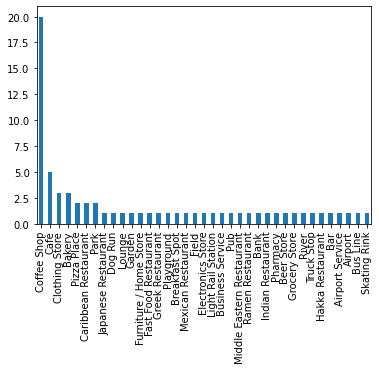

In [51]:
toronto_clu_lab_3['1st Most Common Venue'].value_counts().plot(kind='bar')
